In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('five_years_data.csv')

In [3]:
housing_data.head()

,Unnamed: 0,period_begin,period_end,city,state,property_type_id,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,...,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,parent_metro_region,parent_metro_region_metro_code
0,5,2024-04-01,2024-04-30,Holiday Lakes,Texas,-1,56000.0,119900.0,58.577406,178.422619,...,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000,"Houston, TX",26420
1,12,2024-05-01,2024-05-31,Krugerville,Texas,-1,712000.0,675000.0,232.662252,246.702890,...,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000,"Dallas, TX",19124
2,25,2024-07-01,2024-07-31,Alice,Texas,-1,148000.0,165000.0,103.496503,107.415902,...,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333,"Alice, TX",10860
3,47,2021-04-01,2021-04-30,Alice,Texas,-1,252000.0,149000.0,106.554703,79.824561,...,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500,"Alice, TX",10860
4,83,2022-11-01,2022-11-30,Watauga,Texas,-1,284000.0,299900.0,199.408470,188.335358,...,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727,"Fort Worth, TX",23104


In [4]:
housing_data = housing_data.drop(columns=["Unnamed: 0", 'property_type_id','parent_metro_region', 'parent_metro_region_metro_code'])
housing_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks
0,2024-04-01,2024-04-30,Holiday Lakes,Texas,56000.0,119900.0,58.577406,178.422619,1.0,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000
1,2024-05-01,2024-05-31,Krugerville,Texas,712000.0,675000.0,232.662252,246.702890,6.0,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000
2,2024-07-01,2024-07-31,Alice,Texas,148000.0,165000.0,103.496503,107.415902,11.0,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333
3,2021-04-01,2021-04-30,Alice,Texas,252000.0,149000.0,106.554703,79.824561,6.0,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500
4,2022-11-01,2022-11-30,Watauga,Texas,284000.0,299900.0,199.408470,188.335358,18.0,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727


In [5]:
# SOURCE: https://simplemaps.com/data/us-cities 
cities_population = pd.read_csv("uscities.csv")

# filter North Carolina, Virginia and Texas 
cities_population = cities_population[cities_population['state_name'].isin(['North Carolina', 'Texas', 'Virginia'])]
# Fetch only city, state_name and population columns 
cities_population = cities_population[['city', 'population', 'state_name']]
cities_population.head()

,city,population,state_name
4,Houston,6046392,Texas
5,Dallas,5843632,Texas
25,San Antonio,2069843,Texas
27,Austin,1915031,Texas
39,Charlotte,1436613,North Carolina


In [6]:
# mergind the populaiton datafram into the housind data (addinng us cities cesnus data to the housing data file)
housing_data = pd.merge(housing_data, cities_population, how='left', left_on=['city', 'state'], right_on=['city', 'state_name'])
housing_data = housing_data.drop(columns=['state_name'])

housing_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
0,2024-04-01,2024-04-30,Holiday Lakes,Texas,56000.0,119900.0,58.577406,178.422619,1.0,1.0,1.0,3.0,3.0,102.0,0.861538,0.000000,0.000000,853.0
1,2024-05-01,2024-05-31,Krugerville,Texas,712000.0,675000.0,232.662252,246.702890,6.0,6.0,11.0,15.0,2.5,45.0,0.995242,0.166667,0.500000,1929.0
2,2024-07-01,2024-07-31,Alice,Texas,148000.0,165000.0,103.496503,107.415902,11.0,9.0,17.0,57.0,5.2,64.0,0.926397,0.090909,0.333333,17797.0
3,2021-04-01,2021-04-30,Alice,Texas,252000.0,149000.0,106.554703,79.824561,6.0,16.0,15.0,27.0,4.5,102.0,0.985631,0.333333,0.312500,17797.0
4,2022-11-01,2022-11-30,Watauga,Texas,284000.0,299900.0,199.408470,188.335358,18.0,22.0,19.0,33.0,1.8,39.0,0.984357,0.222222,0.272727,23336.0


In [7]:
# filter Texas data based on cities population size in descending order to know the largest city based on population size 
texas_data = housing_data[housing_data['state']=='Texas']
texas_data = texas_data.sort_values(by='population', ascending=False)
texas_data.to_csv("texas_data.csv", index=False)
texas_data.head(1)

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
181246,2024-07-01,2024-07-31,Houston,Texas,159000.0,340000.0,150.397082,181.523283,170.0,185.0,270.0,1074.0,6.3,57.0,0.954549,0.052941,0.124324,6046392.0


In [8]:
# Filter Houston TX data (largest population)
huston_TX = texas_data[texas_data['city']=='Houston']
huston_TX.to_csv("huston_TX_data.csv", index=False)
huston_TX.head(1)

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
181246,2024-07-01,2024-07-31,Houston,Texas,159000.0,340000.0,150.397082,181.523283,170.0,185.0,270.0,1074.0,6.3,57.0,0.954549,0.052941,0.124324,6046392.0


In [9]:
print(f"number of rows for Huston data is: {len(huston_TX)}")

number of rows for Huston data is: 300


In [10]:
# Filter the North Carlolina cities population in descending order
NC_data = housing_data[housing_data['state']=='North Carolina']
NC_data = NC_data.sort_values(by='population', ascending=False)
NC_data.to_csv("NC_data.csv", index=False)
NC_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
218957,2024-12-01,2024-12-31,Charlotte,North Carolina,389820.0,395000.0,228.108644,230.832646,174.0,NaN,147.0,561.0,3.2,52.0,0.983007,0.126437,0.200000,1436613.0
237945,2023-02-01,2023-02-28,Charlotte,North Carolina,560000.0,399900.0,286.298569,225.218023,3.0,NaN,4.0,10.0,3.3,18.0,1.023028,0.666667,0.400000,1436613.0
76811,2024-07-01,2024-07-31,Charlotte,North Carolina,405000.0,400000.0,237.651187,240.014793,204.0,NaN,249.0,609.0,3.0,39.0,0.989842,0.191176,0.424779,1436613.0
209000,2021-03-01,2021-03-31,Charlotte,North Carolina,304500.0,330000.0,169.445628,189.646064,272.0,NaN,293.0,518.0,1.9,35.0,1.010810,0.466912,0.655844,1436613.0
47730,2024-03-01,2024-03-31,Charlotte,North Carolina,335500.0,420000.0,330.619974,246.101937,136.0,NaN,172.0,304.0,2.2,34.0,0.986313,0.279412,0.553191,1436613.0


In [11]:
# Filter out the largest city in North Carolina 
charlotte_data = NC_data[NC_data['city']=='Charlotte']
charlotte_data.to_csv("Charlotte_data.csv", index=False)
charlotte_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
218957,2024-12-01,2024-12-31,Charlotte,North Carolina,389820.0,395000.0,228.108644,230.832646,174.0,NaN,147.0,561.0,3.2,52.0,0.983007,0.126437,0.200000,1436613.0
237945,2023-02-01,2023-02-28,Charlotte,North Carolina,560000.0,399900.0,286.298569,225.218023,3.0,NaN,4.0,10.0,3.3,18.0,1.023028,0.666667,0.400000,1436613.0
76811,2024-07-01,2024-07-31,Charlotte,North Carolina,405000.0,400000.0,237.651187,240.014793,204.0,NaN,249.0,609.0,3.0,39.0,0.989842,0.191176,0.424779,1436613.0
209000,2021-03-01,2021-03-31,Charlotte,North Carolina,304500.0,330000.0,169.445628,189.646064,272.0,NaN,293.0,518.0,1.9,35.0,1.010810,0.466912,0.655844,1436613.0
47730,2024-03-01,2024-03-31,Charlotte,North Carolina,335500.0,420000.0,330.619974,246.101937,136.0,NaN,172.0,304.0,2.2,34.0,0.986313,0.279412,0.553191,1436613.0


In [12]:
print(f'The number of rows in charlotte data is: {(len(charlotte_data))}')

The number of rows in charlotte data is: 299


In [13]:
# Filtering Virginia data based on cities population in decsending order 
virginia_data = housing_data[housing_data['state']=='Virginia'] 
virginia_data = virginia_data.sort_values(by='population', ascending=False)
virginia_data.to_csv("virginia_data.csv", index=False)
virginia_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
69892,2023-02-01,2023-02-28,Virginia Beach,Virginia,316500.0,349000.0,174.167269,210.382413,2.0,NaN,1.0,1.0,0.5,18.0,0.996368,0.500000,NaN,1431821.0
92740,2022-04-01,2022-04-30,Virginia Beach,Virginia,420000.0,345000.0,218.750000,201.950523,383.0,466.0,522.0,374.0,1.0,12.0,1.035801,0.697128,0.832618,1431821.0
165447,2020-03-01,2020-03-31,Virginia Beach,Virginia,185000.0,299000.0,137.199198,165.923331,124.0,158.0,132.0,185.0,1.5,25.0,0.991678,0.306452,0.613924,1431821.0
107552,2020-03-01,2020-03-31,Virginia Beach,Virginia,318950.0,299000.0,164.904892,165.923331,416.0,526.0,554.0,836.0,2.0,28.0,0.993213,0.250000,0.631179,1431821.0
118684,2021-08-01,2021-08-31,Virginia Beach,Virginia,325000.0,319000.0,184.601665,184.226044,941.0,1026.0,925.0,993.0,1.1,20.0,1.014474,0.573858,0.718324,1431821.0


In [14]:
virginia_beach_data = virginia_data[virginia_data['city']=='Virginia Beach']
virginia_beach_data.to_csv("virginia_beach_data.csv", index=False)
virginia_beach_data.head()

,period_begin,period_end,city,state,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population
69892,2023-02-01,2023-02-28,Virginia Beach,Virginia,316500.0,349000.0,174.167269,210.382413,2.0,NaN,1.0,1.0,0.5,18.0,0.996368,0.500000,NaN,1431821.0
92740,2022-04-01,2022-04-30,Virginia Beach,Virginia,420000.0,345000.0,218.750000,201.950523,383.0,466.0,522.0,374.0,1.0,12.0,1.035801,0.697128,0.832618,1431821.0
165447,2020-03-01,2020-03-31,Virginia Beach,Virginia,185000.0,299000.0,137.199198,165.923331,124.0,158.0,132.0,185.0,1.5,25.0,0.991678,0.306452,0.613924,1431821.0
107552,2020-03-01,2020-03-31,Virginia Beach,Virginia,318950.0,299000.0,164.904892,165.923331,416.0,526.0,554.0,836.0,2.0,28.0,0.993213,0.250000,0.631179,1431821.0
118684,2021-08-01,2021-08-31,Virginia Beach,Virginia,325000.0,319000.0,184.601665,184.226044,941.0,1026.0,925.0,993.0,1.1,20.0,1.014474,0.573858,0.718324,1431821.0


In [15]:
print(f'Number of rows in Virginia Beach data are: {(len(virginia_beach_data))}')

Number of rows in Virginia Beach data are: 291


### Analyzing Charlotte's overtime house market trend


In [16]:
# drop city and state columns
charlotte_data = charlotte_data.drop(columns=['city', 'state'])

In [17]:
charlotte_data.isna().mean() * 100


period_begin                 0.0
period_end                   0.0
median_sale_price            0.0
median_list_price            0.0
median_ppsf                  0.0
median_list_ppsf             0.0
homes_sold                   0.0
pending_sales              100.0
new_listings                 0.0
inventory                    0.0
months_of_supply             0.0
median_dom                   0.0
avg_sale_to_list             0.0
sold_above_list              0.0
off_market_in_two_weeks      0.0
population                   0.0
dtype: float64

In [18]:
# drop columns that has 100 missing values 
charlotte_data = charlotte_data.drop(columns=['pending_sales'])


In [19]:
# Optimizind the data types for each columns 
charlotte_data.dtypes

period_begin                object
period_end                  object
median_sale_price          float64
median_list_price          float64
median_ppsf                float64
median_list_ppsf           float64
homes_sold                 float64
new_listings               float64
inventory                  float64
months_of_supply           float64
median_dom                 float64
avg_sale_to_list           float64
sold_above_list            float64
off_market_in_two_weeks    float64
population                 float64
dtype: object

In [20]:
# converting date columns 
charlotte_data['period_begin']=pd.to_datetime(charlotte_data['period_begin'])
charlotte_data['period_end']=pd.to_datetime(charlotte_data['period_end'])

In [21]:
# converting numeric columns to optimize memory usage 
float_cols = ['median_sale_price', 'median_list_price', 'median_ppsf', 
              'median_list_ppsf', 'months_of_supply', 'avg_sale_to_list', 
              'sold_above_list', 'off_market_in_two_weeks']
charlotte_data[float_cols] = charlotte_data[float_cols].astype('float32')
                                            

In [22]:
int_cols = ['homes_sold', 'new_listings', 'inventory', 
            'median_dom', 'population']
charlotte_data[int_cols]=charlotte_data[int_cols].astype('int32')

In [23]:
charlotte_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 218957 to 191512
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   period_begin             299 non-null    datetime64[ns]
 1   period_end               299 non-null    datetime64[ns]
 2   median_sale_price        299 non-null    float32       
 3   median_list_price        299 non-null    float32       
 4   median_ppsf              299 non-null    float32       
 5   median_list_ppsf         299 non-null    float32       
 6   homes_sold               299 non-null    int32         
 7   new_listings             299 non-null    int32         
 8   inventory                299 non-null    int32         
 9   months_of_supply         299 non-null    float32       
 10  median_dom               299 non-null    int32         
 11  avg_sale_to_list         299 non-null    float32       
 12  sold_above_list          299 non-

#### price trend overtime

In [61]:
# working from the copy of the dataframe
charlotte_data_copy = charlotte_data.copy()

In [62]:
charlotte_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 218957 to 191512
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   period_begin             299 non-null    datetime64[ns]
 1   period_end               299 non-null    datetime64[ns]
 2   median_sale_price        299 non-null    float32       
 3   median_list_price        299 non-null    float32       
 4   median_ppsf              299 non-null    float32       
 5   median_list_ppsf         299 non-null    float32       
 6   homes_sold               299 non-null    int32         
 7   new_listings             299 non-null    int32         
 8   inventory                299 non-null    int32         
 9   months_of_supply         299 non-null    float32       
 10  median_dom               299 non-null    int32         
 11  avg_sale_to_list         299 non-null    float32       
 12  sold_above_list          299 non-

In [84]:
# extract the year from the period_begin tabe 
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year
yearly_avg = charlotte_data_copy.groupby('year').agg(
    median_sale_price=('median_sale_price', 'mean'),
    median_ppsf=('median_ppsf', 'median'), inventory=('inventory', 'mean')
).reset_index()
yearly_avg.head()

,year,median_sale_price,median_ppsf,inventory
0,2020,272626.53125,156.256012,1228.728814
1,2021,326185.15625,191.241013,901.766667
2,2022,380727.96875,223.813797,777.200000
3,2023,393108.40625,231.474213,755.266667
4,2024,426767.09375,242.654297,981.833333


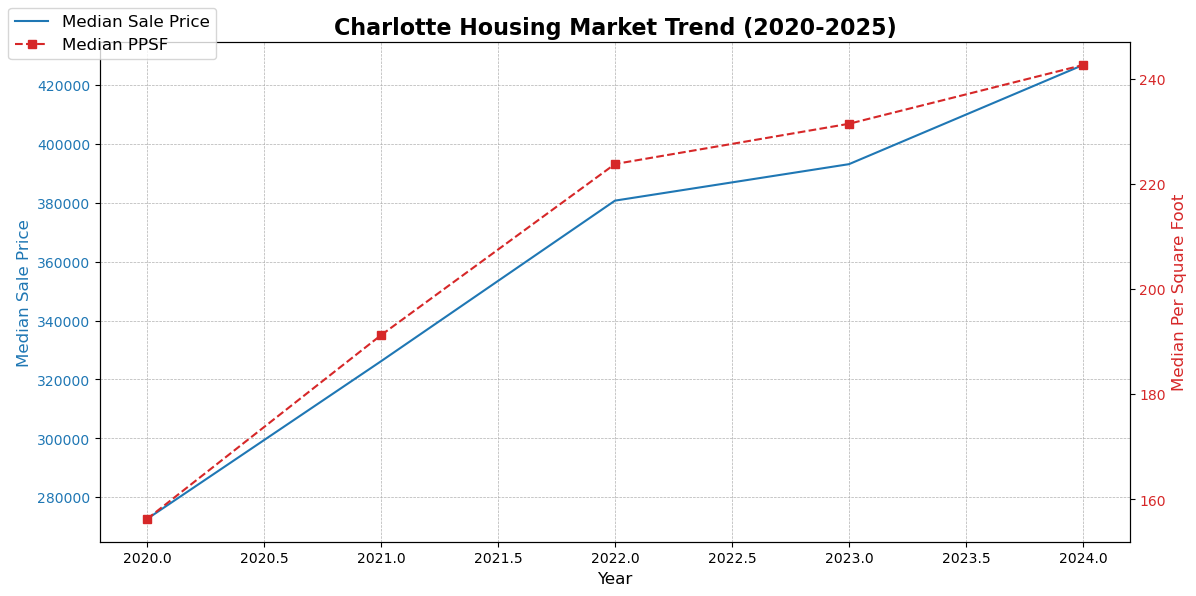

In [87]:
fig, ax1 = plt.subplots(figsize=(12,6))
# Plot median sale price on the first y-axis
ax1.set_title('Charlotte Housing Market Trend (2020-2025)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Median Sale Price', color='tab:blue', fontsize=12)
ax1.plot(yearly_avg['year'], yearly_avg['median_sale_price'], label='Median Sale Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the median PPSF
ax2 = ax1.twinx()
ax2.set_ylabel('Median Per Square Foot', color='tab:red', fontsize=12)
ax2.plot(yearly_avg['year'], yearly_avg['median_ppsf'], label='Median PPSF', color='tab:red', marker='s', linestyle='--', markersize=6)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=10)
ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

fig.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.savefig('charlotte_housing_Market_2020_25.png')
plt.show()

$Analysis:$
- Charlotte Housing Market Surge (2020-2025): Median Sale Price Soars from Below 280K to Over 420K

In [91]:
# Grouping listing price, sale price and inventory coulmns by year
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year
yearly_average = charlotte_data_copy.groupby('year').agg(
    listing_price=('median_list_price', 'mean'),
    sale_price=('median_sale_price', 'mean'), 
    inventory =('inventory', 'mean')
).reset_index()
yearly_average.head()

,year,listing_price,sale_price,inventory
0,2020,291759.18750,272626.53125,1228.728814
1,2021,339648.03125,326185.15625,901.766667
2,2022,384997.50000,380727.96875,777.200000
3,2023,403750.00000,393108.40625,755.266667
4,2024,417080.62500,426767.09375,981.833333


In [ ]:
# Drawing line charge to compare the listing and sale pricea as well as the inventory over the last five year 

fig, ax1 = plt.subplots(figsize=(12,6))
# plotting list and sale price 
ax1.set_xalabel('year', fontsize=12)
ax1.set_ylabel('price', fontsize=12)
ax1.plot(yearly_average['year'], yearly_avergae['median_sale_price'], lablel='Median Sale Price', color='tab:blue', marker="o")
ax1.plot(yearly_average['year'], yearly_average['median-listing_price'], label ='Median Listing Price', color='tab:green', marker='o')


In [65]:
print(yearly_avg.columns)

Index(['year', 'median_price', 'median_ppsf'], dtype='object')


,period_begin,period_end,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,new_listings,inventory,months_of_supply,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,population,year
218957,2024-12-01,2024-12-31,389820.0,395000.0,228.108643,230.832642,174,147,561,3.2,52,0.983007,0.126437,0.200000,1436613,2024
237945,2023-02-01,2023-02-28,560000.0,399900.0,286.298553,225.218018,3,4,10,3.3,18,1.023028,0.666667,0.400000,1436613,2023
76811,2024-07-01,2024-07-31,405000.0,400000.0,237.651184,240.014786,204,249,609,3.0,39,0.989842,0.191176,0.424779,1436613,2024
209000,2021-03-01,2021-03-31,304500.0,330000.0,169.445633,189.646057,272,293,518,1.9,35,1.010810,0.466912,0.655844,1436613,2021
47730,2024-03-01,2024-03-31,335500.0,420000.0,330.619965,246.101944,136,172,304,2.2,34,0.986313,0.279412,0.553191,1436613,2024


NameError: name 'mdates' is not defined

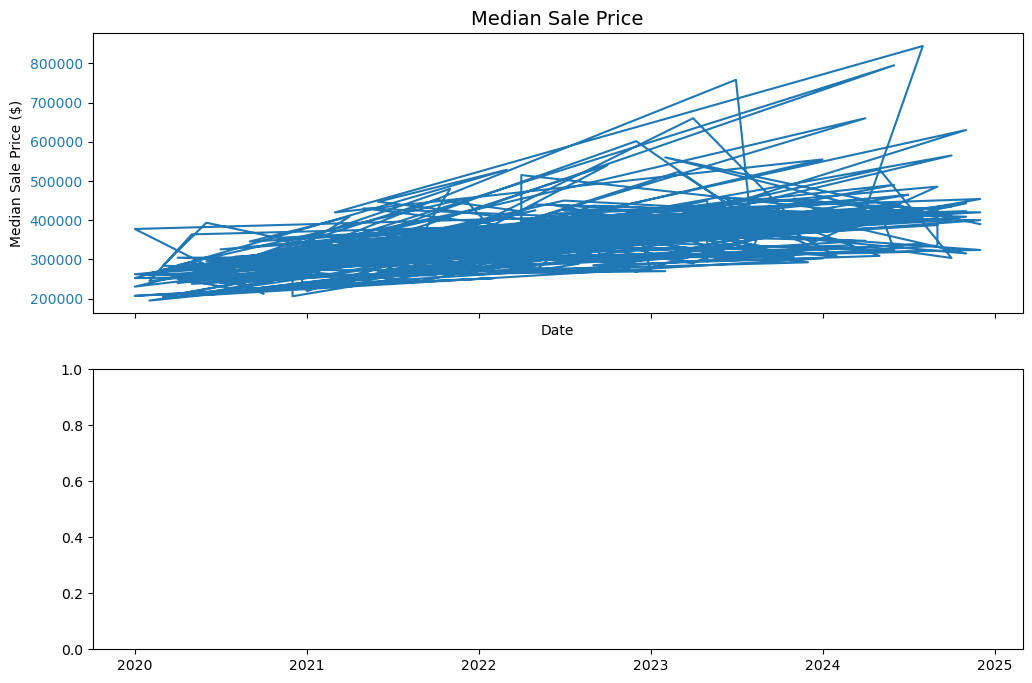

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Median Sale Price
ax1.set_title('Median Sale Price', fontsize=14)
ax1.set_xlabel('Date')
ax1.set_ylabel('Median Sale Price ($)')
ax1.plot(charlotte_data_copy.index, charlotte_data_copy['median_sale_price'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Median PPSF
ax2.set_title('Median PPSF', fontsize=14)
ax2.set_xlabel('Date')
ax2.set_ylabel('Median PPSF ($)')
ax2.plot(charlotte_data_copy.index, charlotte_data_copy['median_ppsf'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.tick_params(axis='x', rotation=45)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

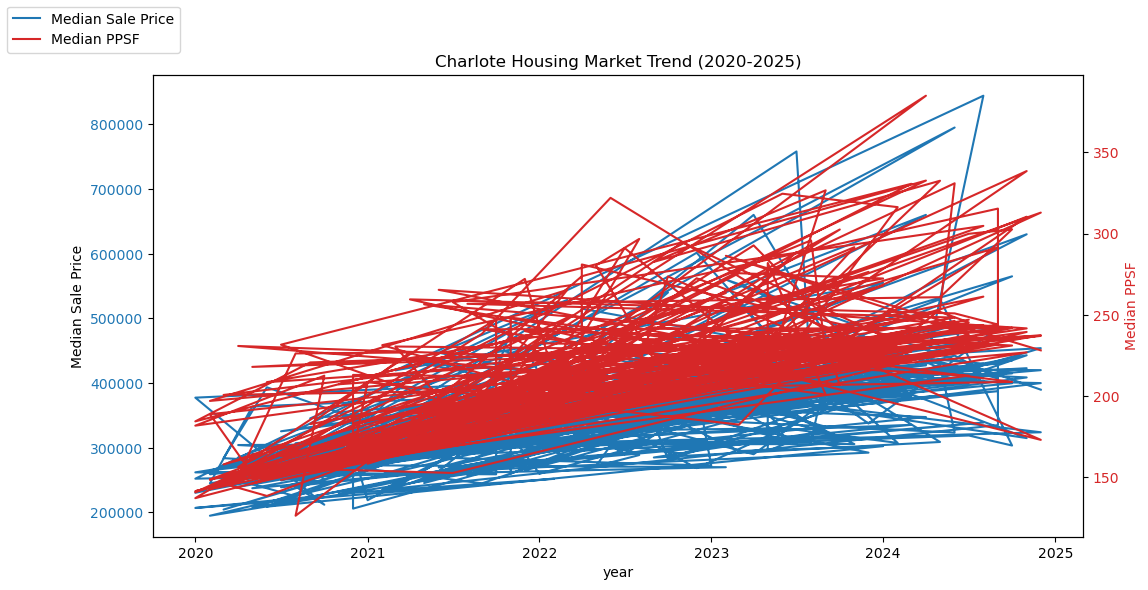

In [28]:
# set date as index
charlotte_data_copy.set_index('period_begin', inplace=True)
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('Charlote Housing Market Trend (2020-2025)')
ax1.set_xlabel('year')
ax1.set_ylabel('Median Sale Price')
# plotting the median sale price 
ax1.plot(charlotte_data_copy.index, charlotte_data_copy['median_sale_price'], label='Median Sale Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
# add price per square foot (ppsf). This will be added on the Y axis 
# this axis shares x- axis with ax(the year)
ax2 = ax1.twinx()
ax2.set_ylabel('Median PPSF', color='tab:red')
ax2.plot(charlotte_data_copy.index, charlotte_data_copy['median_ppsf'], label='Median PPSF', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')


fig.legend(loc='upper left')
plt.show()



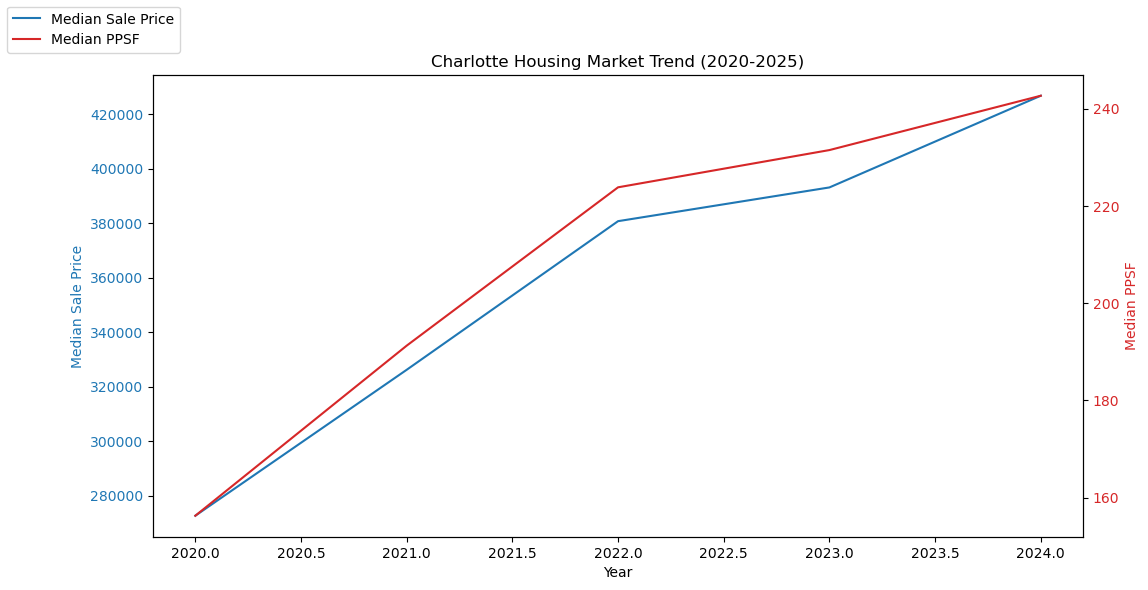

In [51]:
# Extract the year from the period_begin column
charlotte_data_copy['year'] = charlotte_data_copy['period_begin'].dt.year

# Group by year and calculate mean median_sale_price and median ppsf
yearly_avg = charlotte_data_copy.groupby('year').agg(
    median_sale_price=('median_sale_price', 'mean'),
    median_ppsf=('median_ppsf', 'median')
).reset_index()

# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot median sale price on the first y-axis
ax1.set_title('Charlotte Housing Market Trend (2020-2025)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Median Sale Price', color='tab:blue')
ax1.plot(yearly_avg['year'], yearly_avg['median_sale_price'], label='Median Sale Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the median PPSF
ax2 = ax1.twinx()
ax2.set_ylabel('Median PPSF', color='tab:red')
ax2.plot(yearly_avg['year'], yearly_avg['median_ppsf'], label='Median PPSF', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a legend and show the plot
fig.legend(loc='upper left')
plt.show()